In [1]:
from speechbrain.pretrained import VAD
import numpy as np
import torchaudio
import os
#import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import resample
import time
import matplotlib.pyplot as plt

torchvision is not available - cannot save figures


In [2]:
#VAD = VAD.from_hparams(source="speechbrain/vad-crdnn-libriparty", savedir="pretrained_models/vad-crdnn-libriparty", run_opts={"device":"cuda"} )
VAD = VAD.from_hparams(source="speechbrain/vad-crdnn-libriparty", savedir="pretrained_models/vad-crdnn-libriparty")

In [ ]:
path = "../dataset/Genea2023/trn/main-agent/wav"
out = "../dataset/Genea2023/trn/main-agent/vad"
fps = 30
sr = 16000
for file in os.listdir(path):
    start = time.time()
    print('Processing file {}'.format(file))
    audio, old_sr = torchaudio.load(os.path.join(path,file))
    audio = torchaudio.functional.resample(audio, orig_freq=44100, new_freq=sr)
    tmpfile = os.path.join(path, "tmp.wav")
    torchaudio.save(
       tmpfile , audio, sr
    )
    boundaries = VAD.get_speech_prob_file(audio_file=tmpfile, large_chunk_size=4, small_chunk_size=0.2)
    boundaries = resample(boundaries[0,:,0], int(boundaries.shape[1]*30/100))
    boundaries[boundaries>=0.5] = 1
    boundaries[boundaries<0.5] = 0
    np.save(os.path.join(out, file[:-4]+'.npy'), boundaries)
    print('Done ', time.time()-start)

Processing file tmp.wav
Done  0.5340447425842285
Processing file trn_2023_v0_000_main-agent.wav
Done  1.2706921100616455
Processing file trn_2023_v0_001_main-agent.wav
Done  6.252580404281616
Processing file trn_2023_v0_002_main-agent.wav
Done  4.665696144104004
Processing file trn_2023_v0_003_main-agent.wav
Done  3.372727394104004
Processing file trn_2023_v0_004_main-agent.wav
Done  3.694272518157959
Processing file trn_2023_v0_005_main-agent.wav
Done  1.1636500358581543
Processing file trn_2023_v0_006_main-agent.wav
Done  8.65675973892212
Processing file trn_2023_v0_007_main-agent.wav
Done  2.4977362155914307
Processing file trn_2023_v0_008_main-agent.wav
Done  9.991144180297852
Processing file trn_2023_v0_009_main-agent.wav
Done  1.174708604812622
Processing file trn_2023_v0_010_main-agent.wav
Done  0.8914310932159424
Processing file trn_2023_v0_011_main-agent.wav
Done  11.148631572723389
Processing file trn_2023_v0_012_main-agent.wav
Done  3.213815450668335
Processing file trn_2023

In [ ]:
path = "../dataset/Genea2023/val/main-agent/wav"
out = "../dataset/Genea2023/val/main-agent/vad"
fps = 30
sr = 16000
for file in os.listdir(path):
    start = time.time()
    print('Processing file {}'.format(file))
    audio, old_sr = torchaudio.load(os.path.join(path,file))
    audio = torchaudio.functional.resample(audio, orig_freq=44100, new_freq=sr)
    tmpfile = os.path.join(path, "tmp.wav")
    torchaudio.save(
       tmpfile , audio, sr
    )
    boundaries = VAD.get_speech_prob_file(audio_file=tmpfile, large_chunk_size=4, small_chunk_size=0.2)
    boundaries = resample(boundaries[0,:,0], int(boundaries.shape[1]*30/100))
    boundaries[boundaries>=0.5] = 1
    boundaries[boundaries<0.5] = 0
    np.save(os.path.join(out, file[:-4]+'.npy'), boundaries)
    print('Done ', time.time()-start)

In [206]:
audio, old_sr = torchaudio.load("../dataset/Genea2023/trn/main-agent/wav/trn_2023_v0_034_main-agent.wav")
fps = 30
sr = 16000
print(audio.shape)
audio = torchaudio.functional.resample(audio, orig_freq=44100, new_freq=sr)
print(audio.shape)
tmpfile = os.path.join( "../dataset/Genea2023/trn/main-agent/wav", "tmp.wav")
torchaudio.save(
       tmpfile , audio, sr
    )

torch.Size([1, 2998800])
torch.Size([1, 1088000])


In [207]:
boundaries = VAD.get_speech_prob_file(audio_file=tmpfile, large_chunk_size=4, small_chunk_size=0.2)
print(audio.shape)
print(boundaries.shape)
boundaries = resample(boundaries[0,:,0], int(boundaries.shape[1]*30/100))
print(boundaries.shape)

torch.Size([1, 1088000])
torch.Size([1, 6800, 1])
(2040,)


(2040,)


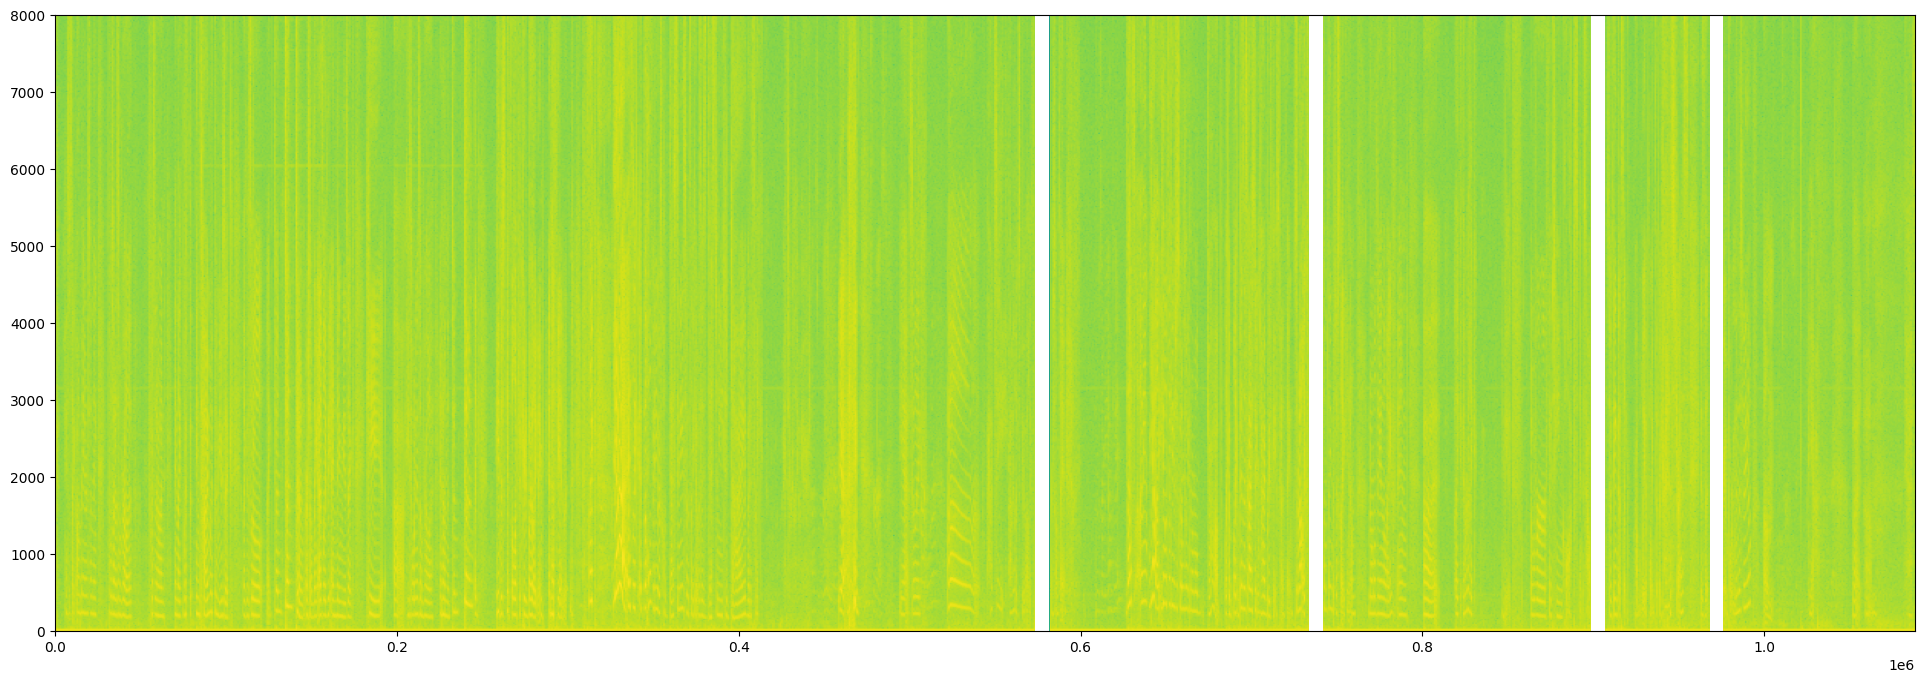

In [208]:
print(boundaries.shape)
fig,ax = plt.subplots(figsize=(24,8))
ax.specgram(audio[0], Fs = sr, NFFT=1024, scale='default', xextent=(0,audio[0].shape[0]))
ax.plot
plt.show()

(2040,)


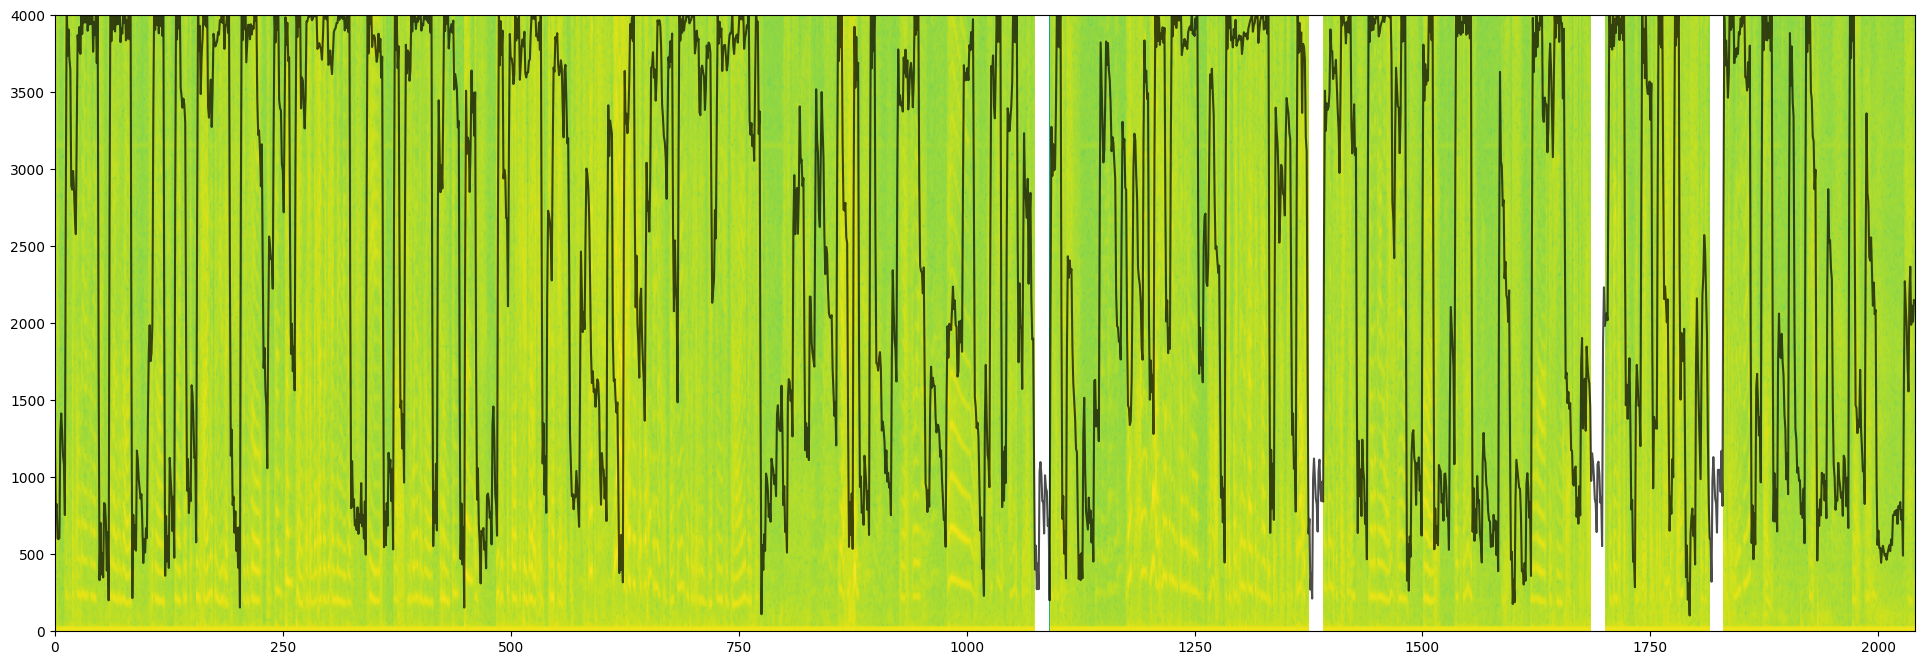

In [209]:
print(boundaries.shape)
fig,ax = plt.subplots(figsize=(24,8))
ax.specgram(audio[0], Fs = sr, NFFT=1024, scale='default', xextent=(0,boundaries.shape[0]))
plt.plot(np.arange(boundaries.shape[0]), boundaries*4000, color='black', alpha=0.7)
ax.set_ylim(0,4000)
ax.plot
plt.show()

In [210]:
boundaries[boundaries>=0.5] = 1
boundaries[boundaries<0.5] = 0

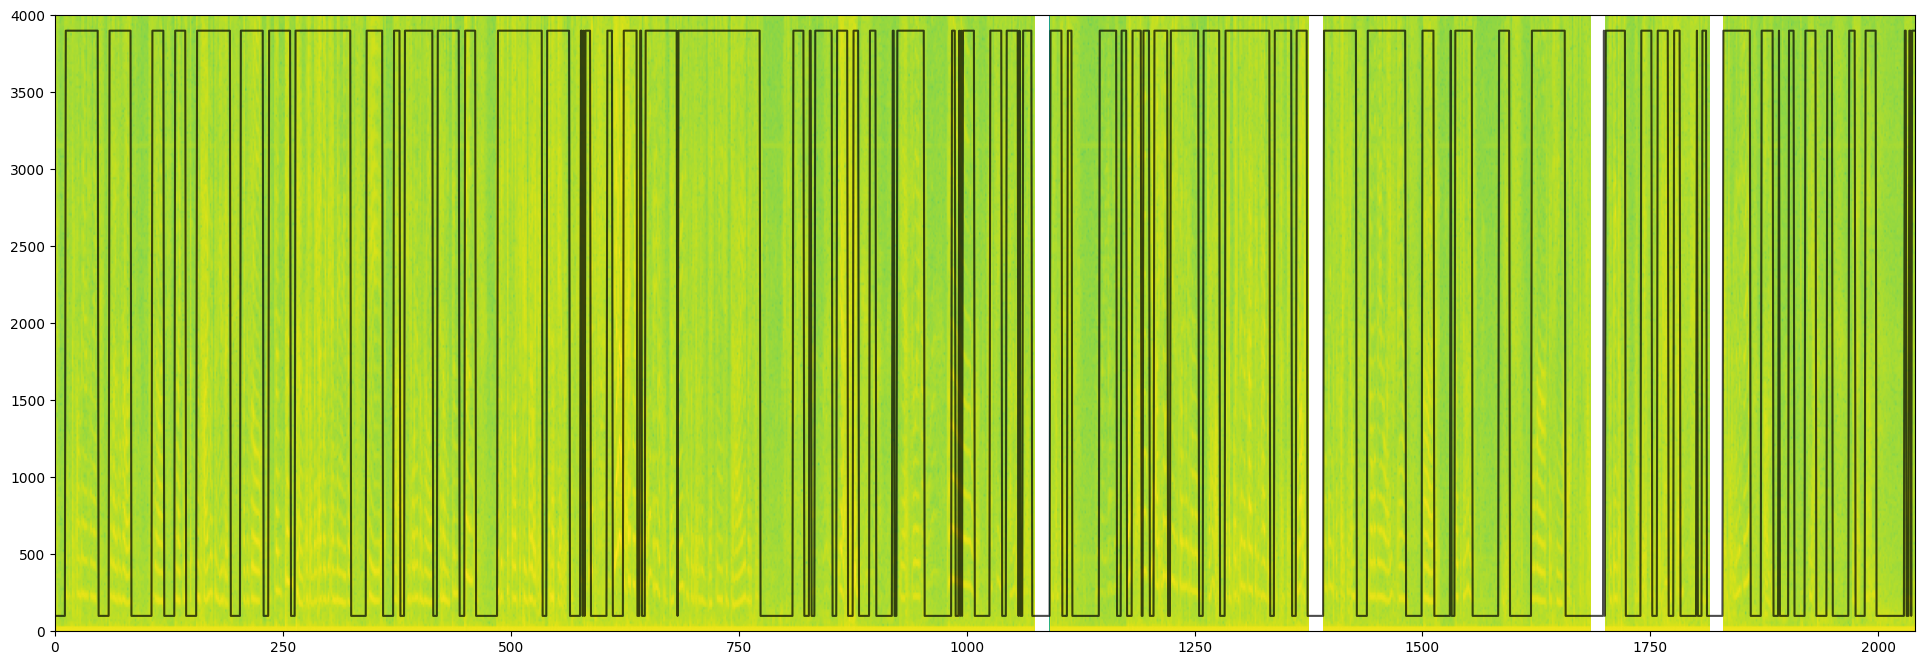

In [211]:
fig,ax = plt.subplots(figsize=(24,8))
ax.specgram(audio[0], Fs = sr, NFFT=1024, scale='default', xextent=(0,boundaries.shape[0]))
plt.plot(np.arange(boundaries.shape[0]), (boundaries*3800)+100, color='black', alpha=0.7)
ax.set_ylim(0,4000)
ax.plot
plt.show()

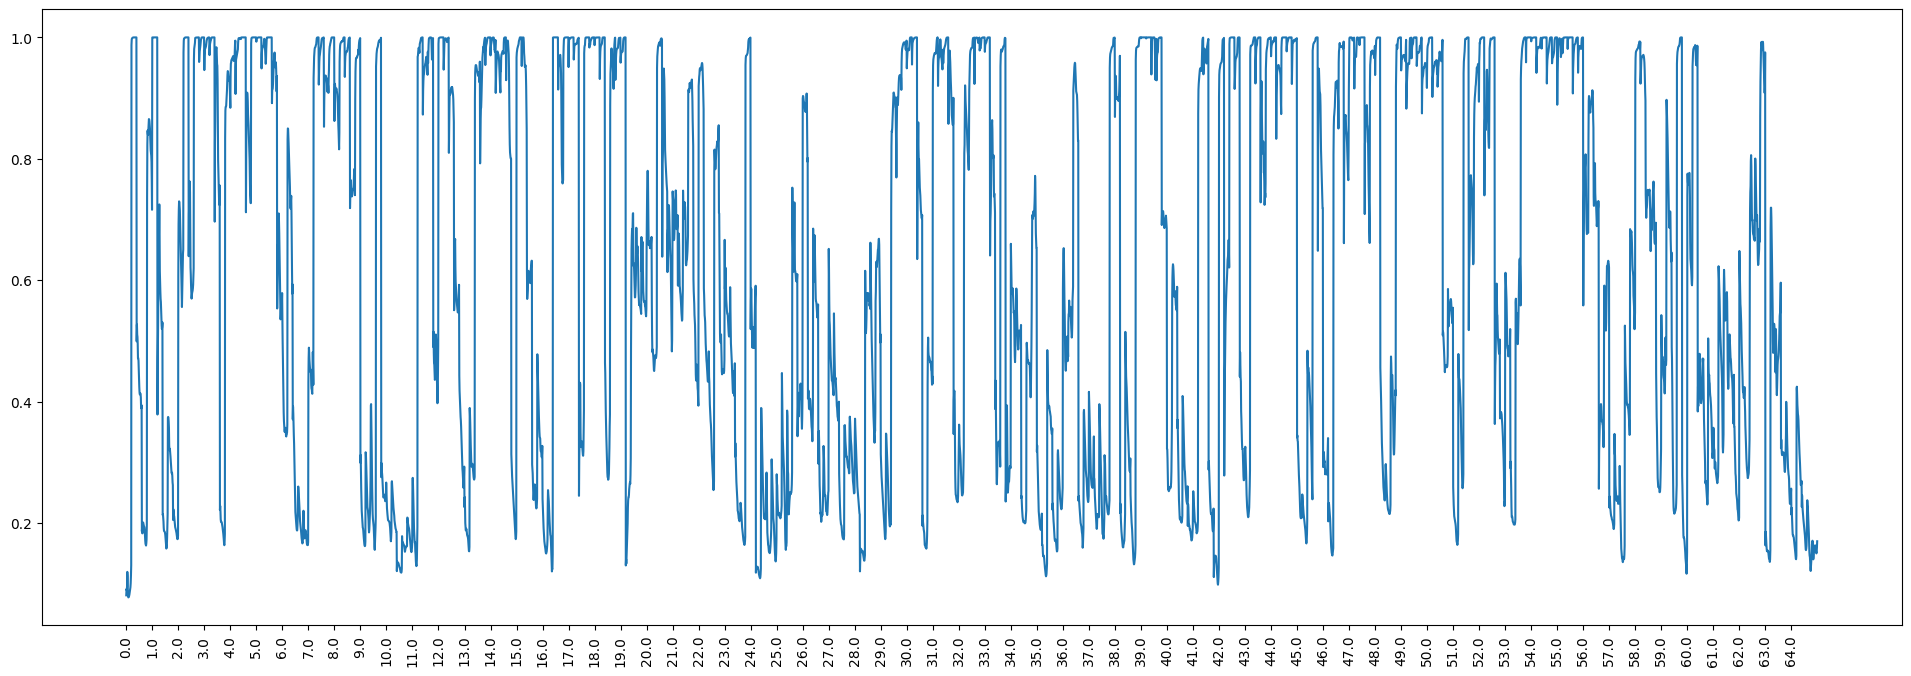

In [56]:
fig = plt.figure(figsize=(24,8))
plt.plot(np.arange(boundaries.shape[1]), boundaries[0,:,0])
x = np.arange(0,boundaries.shape[1]/100,1)
y = [str(i) for i in x]
x *= 100
plt.xticks(x, y, rotation='vertical')
plt.show()

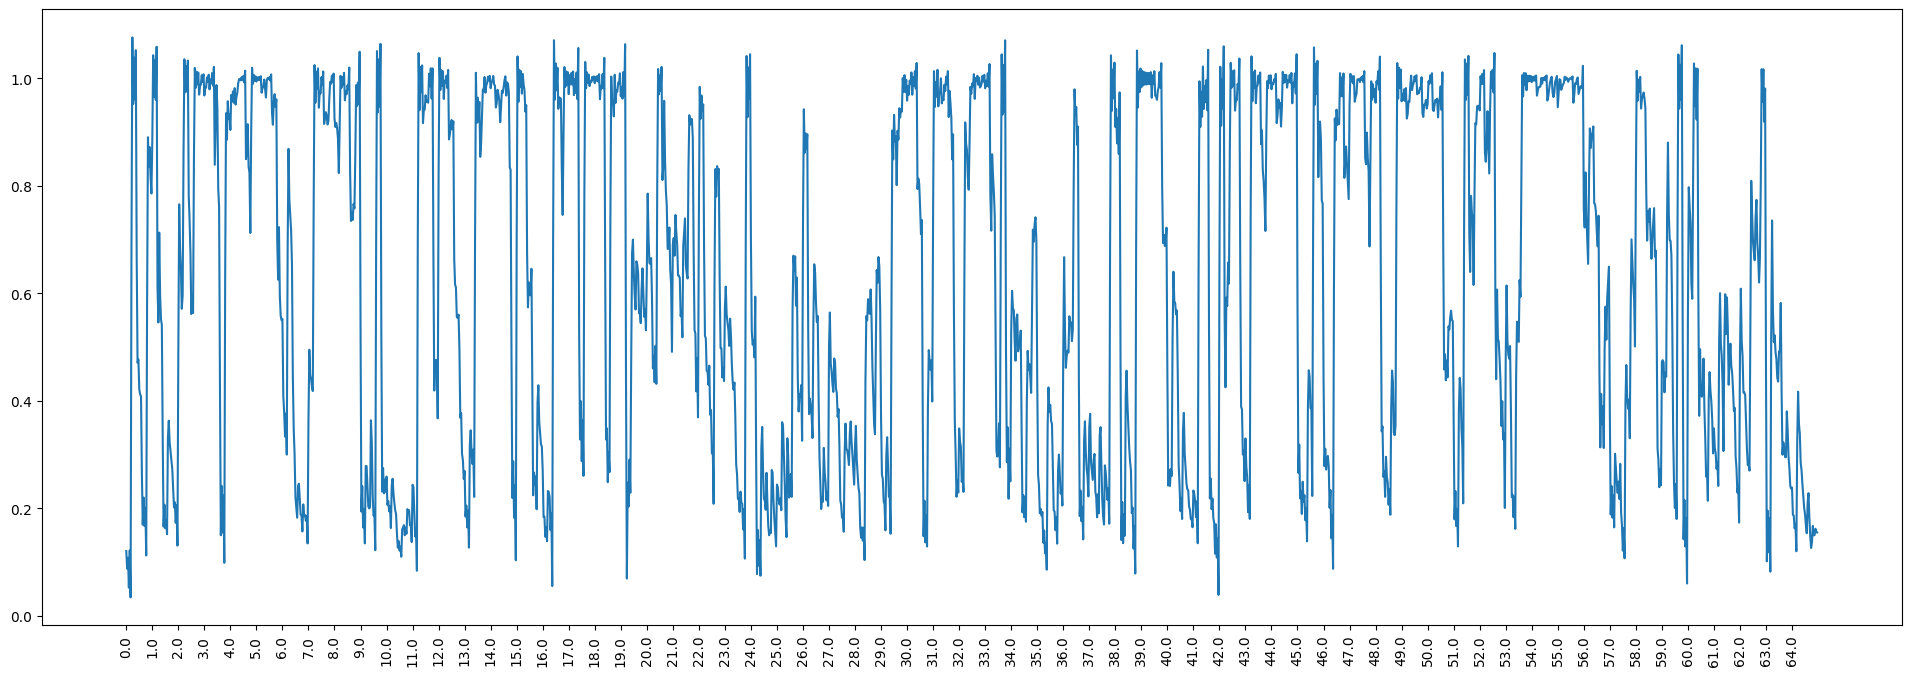

In [59]:
fig = plt.figure(figsize=(24,8))
plt.plot(np.arange(boundaries.shape[0]), boundaries)
x = np.arange(0,boundaries.shape[0]/30,1)
y = [str(i) for i in x]
x *= 30
plt.xticks(x, y, rotation='vertical')
plt.show()

In [60]:
boundaries[boundaries>=0.5] = 1
boundaries[boundaries<0.5] = 0

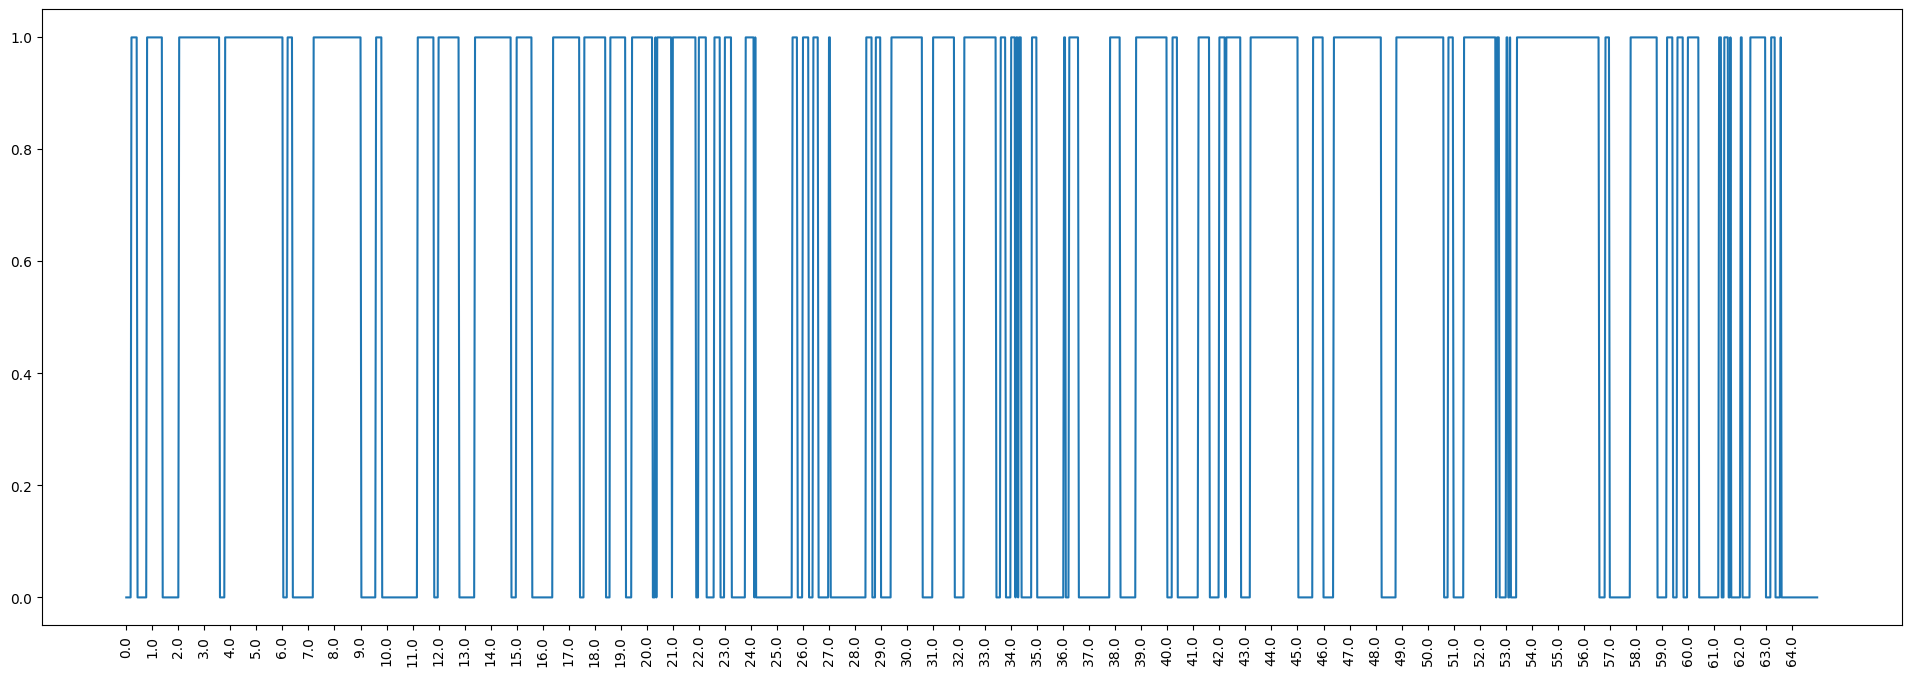

In [61]:
fig = plt.figure(figsize=(24,8))
plt.plot(np.arange(boundaries.shape[0]), boundaries)
x = np.arange(0,boundaries.shape[0]/30,1)
y = [str(i) for i in x]
x *= 30
plt.xticks(x, y, rotation='vertical')
plt.show()

(19845,)
661.5


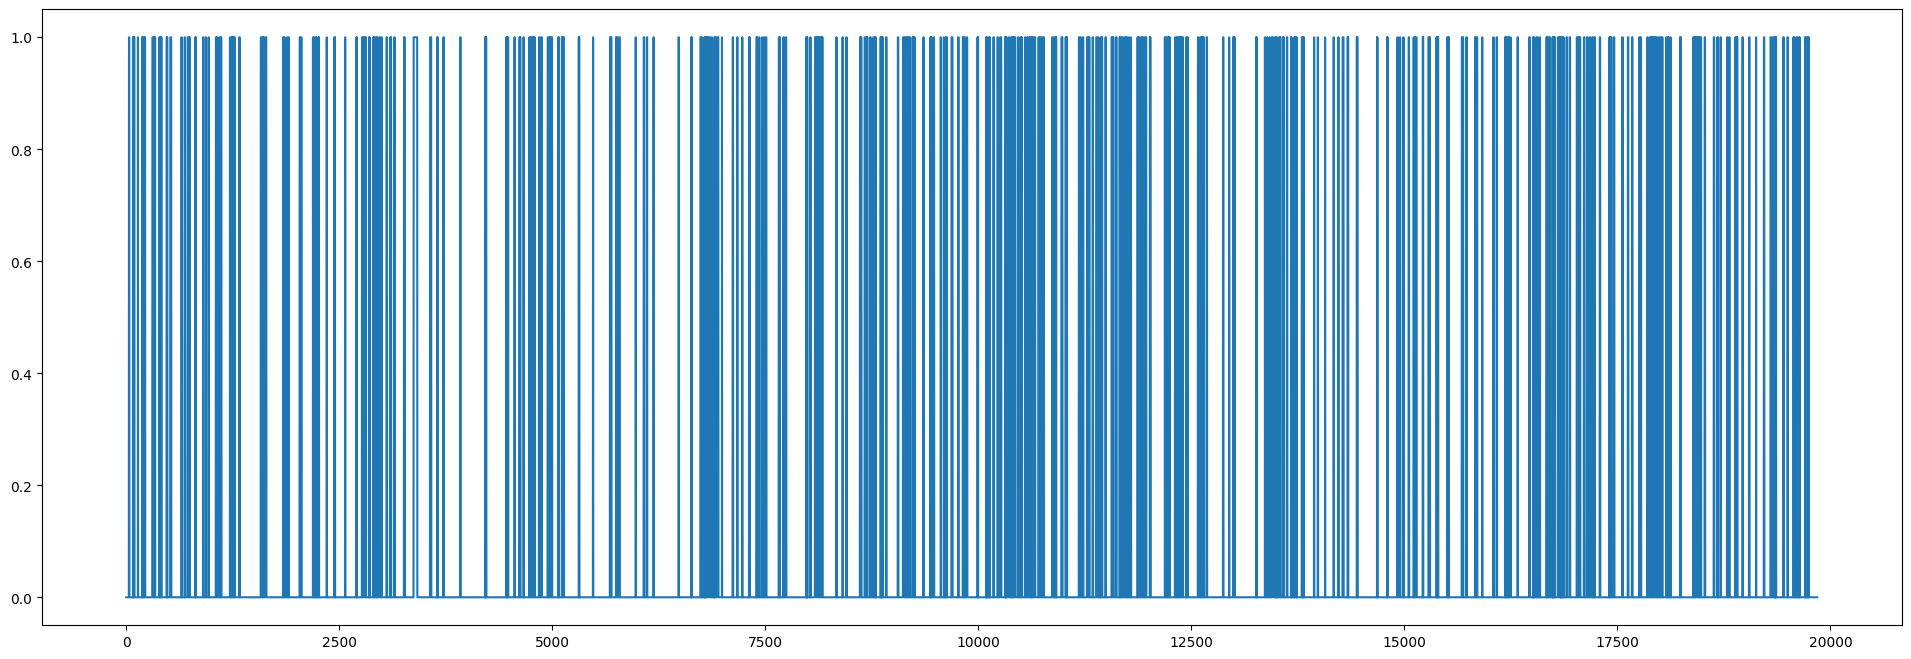

In [157]:
exemplo = np.load('../dataset/Genea2023/trn/main-agent/vad/trn_2023_v0_001_main-agent.npy')
print(exemplo.shape)
print(exemplo.shape[0]/30)
fig = plt.figure(figsize=(24,8))
plt.plot(exemplo)